# HW3 due 5p Fri April 23, 2021

You are welcome (and encouraged) to work with others, but each individual must submit their own writeup.
You can do the Group work portion in class with your classmates on Wednesdays to get full credit, but you can choose to do that portion individually and submit it along with your hw for a grade (i.e. you will not automatically get full credit). 

You are welcome to use analytical and numerical computational tools; if you do, include the **commented** sourcecode in your submission (e.g. the .ipynb file).

You are welcome to consult websites, textbooks, and other materials; if you do, include a full citation in your writeup (e.g. the .ipynb file).

**Important:** before you do any work in the Colaboratory notebook, click "File -> Save a copy in Drive ..." and rename the file to something memorable.

**Also important:** To produce a .pdf for submission to Canvas, click "File -> Print" (or press Ctrl/Cmd + P), and choose "Save to PDF" or "Microsoft Print to PDF" as your printer.


# Group work -- Wed April 21

I encourage you to attend the group work session on Wednesdays to complete the group work portion of your homework -- you will get full credit as long as you participate and make an effort on the problem. This is also a great opportunity to get to know your classmates. Only one person needs to submit.

Please note that only one person can edit the Colaboratory notebook at a time, I recommend creating a copy for yourself and copy pasting your solutions in the discord or Zoom chat if people want to work on different parts of the writeup.

## 1. Groupmates: [Names of everyone in your group]

## 2. [15 min]: Stable and unstable systems (don't have to do if submitting individually)

Pick a plant to talk about (e.g., cruise control in a car -- you can't pick this example) and a desired reference trajectory (e.g., 60 mph). Is your feedback system stable without an input (i.e., if the plant is disturbed like the car started going up a hill, would your plant return to your desired reference trajectory without any torque)? Why or why not? Is there another reference trajectory you can pick that will make the plant stable without any input? You don't have to write down everything you discussed, but please write down what plant, the reference you picked, and whether you think that the feedback system will be stable or not.

## 3. [60 min] parametric stability

Consider the linear system

$$ \dot{x} = \left[\begin{matrix} 0 & 1 \\ 0 & -3 \end{matrix}\right]x + \left[\begin{matrix} -1 \\ 4 \end{matrix}\right] u. $$

## open-loop system

***Purpose:*** assess stability of an uncontrolled ("open-loop") system in state-space form using eigenvalues.

First, we'll consider the *open-loop* linear system's $``A"$ matrix,

$$ A = \left[\begin{matrix} 0 & 1 \\ 0 & -3 \end{matrix}\right]. $$

a. What are the eigenvalues of $A$?  How did you determine them?

b. Is this system stable (all eigenvalues have negative real part) or unstable (one or more eigenvalues has zero or positive real part)?

## closed-loop system

***Purpose:*** assess stability of a controlled ("closed-loop") system in state-space form using eigenvalues as a function of a parameter.

Now we'll consider the effect of the output feedback $u = \left[\begin{matrix} -k & 0 \end{matrix}\right] x$, which results in the following ***closed-loop*** $``A"$ matrix for the linear system:

$$ A = \left[\begin{matrix} k & 1 \\ -4k & -3 \end{matrix}\right]. $$

c. What are the eigenvalues of $A$?  How did you determine them?

d. Plot the eigenvalues of $A$ in the complex plane for $k\ge 0$; annotate the plot with several values of $k$.

***Takeaway:*** this kind of plot is termed a ***root locus*** -- the eigenvalues are the *roots* of the characteristic polynomial $a(s)$ for $A$, and their plot is the *locus* of points that satisfy the homogenous equation $a(s) = 0$.  Later we'll learn more techniques for predicting and interpreting a linear system's root locus plot.  We'll pay particular attention to whether the eigenvalues lie in the left-half-plane, i.e. whether the system is stable.

### * end of group work -- download as PDF and submit as part of group assignment *

# 0. [preferred name]; [preferred pronouns]

a. Approximately how many hours did you spend on this assignment?

b. Were there specific problems that took much longer than others?

c. What class meeting(s) did you participate in this week?

d. What timezone(s) were you working in this week?

# 1. proportional-integral control

This problem considers the following standard negative feedback block diagram.

![negative feedback block diagram](http://faculty.washington.edu/sburden/447/447-hw1-feedback.png)

***Purpose:*** you will analyze and synthesize a ***proportional-integral*** controller
$$ C(s) = k_P + k_I/s \iff u(t) = k_P e(t) + k_I \int_0^t e(\tau) d\tau $$ 
for the purpose of ***reference tracking***.  Specifically, you'll apply this controller to a first-order process model $P(s) = b / (s + a)$ to obtain the closed-loop transfer function $G_{yr}$.

**We seek to tune the controller parameters $k_P, k_I$ to obtain complex-conjugate roots $-\sigma_d \pm j \omega_d$ for the closed-loop system, i.e. we want the characteristic polynomial of $G_{yr}$ to be
$$(s + \sigma_d + j \omega_d) (s + \sigma_d - j \omega_d) = s^2 + 2\sigma_d s + \sigma_d^2 + \omega_d^2.$$**

a. By matching coefficients that multiply the same power of the variable $s$ in the actual and desired characteristic polynomials, express $k_P$ and $k_I$ in terms of $\sigma_d,\omega_d,a,b$.

**Solution:**\
First, find the transfer function $G_{yr}(s)$. According to the block diagram:\
$(C(s)(r-y)+v)P(s)=y$\
$\iff (PC+1)y=PCr+Pv$ (omitting (s))\
$\Rightarrow y= \frac{PC}{1+PC}r$\
$\Rightarrow G_{yr}(s) = \frac{P(s)C(s)}{1+P(s)C(s)}$\
Plug in $P = \frac{b}{s+a}, C = \frac{k_Ps+k_I}{s}$\
$\Rightarrow G_{yr}(s) = \frac{k_Pbs+k_Ib}{s^2+(a+k_Pb)s+k_Ib}$

From the transfer function, we know the characteristic polynomial:
$a(s)=s^2+(a+bk_P)s+bk_I$.\
On matching coefficients with the desired polynomial, we have $\fbox{$k_I= \frac{\sigma_d^2 +\omega_d^2}{b}$}$.\
Similarly, $2\sigma_d=(a+bk_P) \Rightarrow \fbox{$k_P=(2\sigma_d-a)/b$}$ as the desired parameters.

--------------------------------

b. Validate your result from (a) using a numerical simulation of the closed-loop system with parameters $a = 1$, $b = 1$:  choose $\sigma_d$, $\omega_d$, determine the corresponding $k_P$, $k_I$, and plot the system's ***step response***, that is, the output corresponding to a reference $r(t)$ that is equal to zero for $t < 0$ and equal to $1$ for $t \geq 0$.

**Solution:**\
According to the transfer function 
$G_{yr}(s) = \frac{k_Pbs+k_Ib}{s^2+(a+k_Pb)s+k_Ib}$\
Write it into DE format:
$\frac{d}{dt}\left[\begin{matrix} y \\ \dot{y} \end{matrix}\right] = \left[\begin{matrix} 0 & 1 \\ -k_Ib & -a-k_Pb \end{matrix}\right]\left[\begin{matrix} y \\ \dot{y} \end{matrix}\right] - \left[\begin{matrix} 0 \\ k_Ib \end{matrix}\right]r$\
Then, numerically simulate the system



[-0.68337521 -7.31662479]


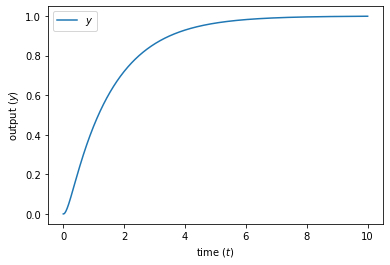

In [2]:
# code for b. goes here

# import modules first
import numpy as np
import pylab as plt
from scipy.integrate import solve_ivp

# build ODE solver
def numerical_simulation(f,t,x,t0=0.,dt=1e-4,ut=None,ux=None,utx=None,return_u=False):
  """
  simulate x' = f(x,u) 

  input:
    f : R x X x U --> X - vector field
      X - state space (must be vector space)
      U - control input set
    t - scalar - final simulation time
    x - initial condition; element of X

    (optional:)
    t0 - scalar - initial simulation time
    dt - scalar - stepsize parameter
    return_u - bool - whether to return u_

    (only one of:)
    ut : R --> U
    ux : X --> U
    utx : R x X --> U

  output:
    t_ - N array - time trajectory
    x_ - N x X array - state trajectory
    (if return_u:)
    u_ - N x U array - state trajectory
  """
  t_,x_,u_ = [t0],[x],[]
  
  inputs = sum([1 if u is not None else 0 for u in [ut,ux,utx]])
  assert inputs <= 1, "more than one of ut,ux,utx defined"

  if inputs == 0:
    assert not return_u, "no input supplied"
  else:
    if ut is not None:
      u = lambda t,x : ut(t)
    elif ux is not None:
      u = lambda t,x : ux(x)
    elif utx is not None:
      u = lambda t,x : utx(t,x)

  while t_[-1]+dt < t:
    if inputs == 0:
      _t,_x = t_[-1],x_[-1]
      dx = f(t_[-1],x_[-1]) * dt
    else:
      _t,_x,_u = t_[-1],x_[-1],u(t_[-1],x_[-1])
      dx = f(_t,_x,_u) * dt
      u_.append( _u )

    x_.append( _x + dx )
    t_.append( _t + dt )

  if return_u:
    return np.asarray(t_),np.asarray(x_),np.asarray(u_)
  else:
    return np.asarray(t_),np.asarray(x_)

a = 1
b = 1

sig = 4
omg = 1

k_i = (sig^2 + omg^2)/b
k_p = (2*sig - a)/b

A = np.array([[0, 1],
              [-k_i*b, -a-k_p*b]])

eigenvalue, _ = np.linalg.eig(A)
print(eigenvalue)

B = np.array([[0],
              [k_i*b]])

def f(t,x,u):
  #x1,x2 = x
  y = np.squeeze(np.dot(x, A.T) + u * B.T)
  return y

dt = 1e-2
# initial condition
y0 = np.array([0, 0])

# simulation time−−
t = 10


time_, y_ = numerical_simulation(f,t,y0,dt=dt,ut=lambda t : 1)

y, dy = y_[:,0], y_[:,1]

plt.figure()
plt.plot(time_, y,label=r'$y$') # label this line for inclusion in a legend
plt.xlabel(r'time ($t$)')
plt.ylabel(r'output ($y$)')
plt.legend() # adds legend using label's specified in plot(...) commands







**According to the preceding analyses, the convergence rate can be made arbitrarily fast (i.e. $\sigma_d$ can be made arbitrarily large) by making the controller parameters $k_P,k_I$ large. In practice, such *high-gain feedback* can excite *unmodeled dynamics* and lead to instability.**

**To see how this can happen, suppose unmodeled dynamics in $P(s)$ (e.g. dynamics of sensors, actuators, vibratory modes, electromagnetic coupling, etc.) have time constant $T > 0$ (assume $-1/T \ll -a$, so we were initially justified in neglecting these dynamics in our model because they are stable and converge much faster than the original modeled dynamics).  Including these dynamics yields the process model**

$$ P(s) = \frac{b}{(s + a)(1 + sT)}. $$

c. Determine the characteristic polynomial of the closed-loop transfer function $G_{yr}$.

**Solution:**

By substituting the value of C(s) from 1a. and P(s) provided above, we can obtain the transfer function G_{yr}(s). For the closed-loop characteristic polynomial, we look at the denominator of G_{yr}(s), which is:   

$a(s) = s(s + a)(1+sT)+bk_Ps+bk_I$  
$ \Leftrightarrow a(s) = s^3+(\frac{1}{T}+a)s^2+\frac{(a+bk_P)}{T}s + \frac{bk_I}{T}$   


 -----------------------

d. Apply the *Routh-Hurwitz stability criterion* to determine algebraic conditions that must be satisfied by $a,b,k_P,k_I,T$ for the closed-loop system to be stable.

**Solution:**

$a(s)=s^3+(\frac{1}{T}+a)s^2+\frac{(a+bk_P)}{T}s + \frac{bk_I}{T}$

Using the Routh-Hurwitz criterion, $a_1,a_2,a_3 > 0$ and $a_1a_2 > a_3$

(1)$$\frac{1}{T}+a > 0$$  
(2)$$\frac{(a+bk_P)}{T} > 0$$  
(3)$$\frac{bk_I}{T} > 0$$  

and

(4)$$(\frac{1}{T}+a) \frac{(a+bk_P)}{T} > \frac{bk_I}{T}$$ $$ \Leftrightarrow \frac{(1+aT)(a+bk_P)}{bk_I} > T$$
 

-----------------------------

**Conclude that $\sigma_d$ is limited by $T$, i.e. the convergence rate of a PI controller applied to a first-order process is limited by the characteristic time constant of unmodeled dynamics.**

e. Validate your result from (d) using a numerical simulation of the closed-loop system with $a = 1$, $b = 1$, $T = 0.1$:  choose $k_P$, $k_I$ such that the Routh-Hurwitz criteria are (i) satisfied (so the closed-loop system is stable) and (ii) violated (so the closed-loop system is unstable), and provide plots showing the step response in these two cases.

**Solution:**\
According to the transfer function 
$G_{yr}(s) = \frac{\frac{k_Pb}{T}s+\frac{k_Ib}{T}}{s^3+\frac{aT+1}{T}s^2+\frac{a+k_Pb}{T}s+\frac{k_Ib}{T}}$\
Write it into DE format:
$\frac{d}{dt}\left[\begin{matrix} y \\ \dot{y} \\ \ddot{y} \end{matrix}\right] = \left[\begin{matrix} 0 & 1 & 0 \\ 0 & 0 & 1 \\ -\frac{k_Ib}{T} & -\frac{a+k_Pb}{T} & -\frac{aT+1}{T} \end{matrix}\right]\left[\begin{matrix} y \\ \dot{y} \\ \ddot{y} \end{matrix}\right] - \left[\begin{matrix} 0 \\ 0 \\ \frac{k_Ib}{T} \end{matrix}\right]r$\
Then, numerically simulate the system


condition (4) violated


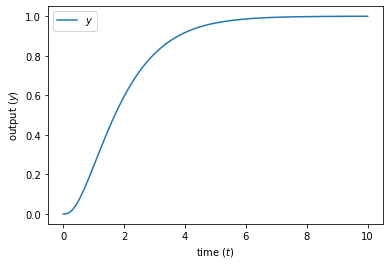

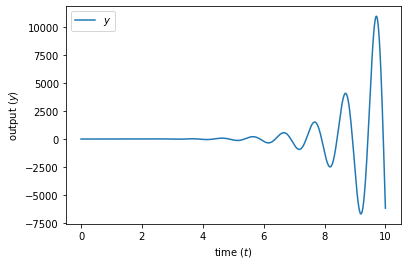

In [3]:
# code of e goes here

# first, use k_i and k_p that satisfy Routh-Hurwitz criterion -------------------
a = 1
b = 1

k_i = 1
k_p = 1

T = 0.1

# check Routh-Hurwitz criterion
if (1/T + a) <= 0:
  print('condition (1) violated')
if (a+k_p*b)/T <= 0:
  print('condition (2) violated')
if k_i*b/T <= 0:
  print('condition (3) violated')
if (1/T + a)*(a+k_p*b) <= b* k_i :
  print('condition (4) violated')


A = np.array([[0, 1, 0],
              [0, 0, 1],
              [-k_i*b/T, -(a+k_p*b)/T, -(a*T + 1)/T]])

B = np.array([[0],
              [0],
              [k_i*b/T]])

def f(t,x,u):
  #x1,x2 = x
  y = np.squeeze(np.dot(x, A.T) + u * B.T)
  return y

dt = 1e-2
# initial condition
y0 = np.array([0, 0, 0])

# simulation time−−
t = 10


time_, y_ = numerical_simulation(f,t,y0,dt=dt,ut=lambda t : 1)

y, dy, ddy = y_[:,0], y_[:,1], y_[:,2]

plt.figure()
plt.plot(time_, y,label=r'$y$') # label this line for inclusion in a legend
plt.xlabel(r'time ($t$)')
plt.ylabel(r'output ($y$)')
plt.legend() # adds legend using label's specified in plot(...) commands

# next, use k_i and k_p that violate Routh-Hurwitz criterion -------------------
a = 1
b = 1

k_i = 50
k_p = 1

T = 0.1

# check Routh-Hurwitz criterion
if (1/T + a) <= 0:
  print('condition (1) violated')
if (a+k_p*b)/T <= 0:
  print('condition (2) violated')
if k_i*b/T <= 0:
  print('condition (3) violated')
if (1/T + a)*(a+k_p*b) <= b* k_i :
  print('condition (4) violated')


A = np.array([[0, 1, 0],
              [0, 0, 1],
              [-k_i*b/T, -(a+k_p*b)/T, -(a*T + 1)/T]])

B = np.array([[0],
              [0],
              [k_i*b/T]])

def f(t,x,u):
  #x1,x2 = x
  y = np.squeeze(np.dot(x, A.T) + u * B.T)
  return y

dt = 1e-2
# initial condition
y0 = np.array([0, 0, 0])

# simulation time−−
t = 10


time_, y_ = numerical_simulation(f,t,y0,dt=dt,ut=lambda t : 1)

y, dy, ddy = y_[:,0], y_[:,1], y_[:,2]

plt.figure()
plt.plot(time_, y,label=r'$y$') # label this line for inclusion in a legend
plt.xlabel(r'time ($t$)')
plt.ylabel(r'output ($y$)')
plt.legend() # adds legend using label's specified in plot(...) commands

# 2. spring-mass-damper a deux
Consider the following spring-mass-damper system:
![spring-mass](http://faculty.washington.edu/sburden/447/447-hw1-spring-mass.png)
The input to this system is the sinusoidal motion of the end of the rightmost spring. 
Applying Newton's laws to determine the forces acting on both masses, we find two coupled second-order DE that model the system's dynamics:

$$ m\ddot{q}_1 = - c \dot{q}_1 - k q_1 + k (q_2 - q_1), $$

$$ m\ddot{q}_2 = - c \dot{q}_2 + k (u - q_2) - k (q_2 - q_1). $$

## change-of-coordinates

***Purpose:*** observe how a clever change-of-coordinates can simplify analysis of a complex system's dynamics.  ***Note:*** you ***do not*** need to solve the DEs in (a.--d.).

a. Combine the two second-order DE above to obtain one fourth-order DE with $u$ as the input and $q_1$ as the output.  (***Note:*** this DE is hard to solve -- since the characteristic polynomial is fourth-order, you can't easily solve for the roots needed to obtain the ***homogeneous solution***.)

b. Rewrite the original two second-order DE in terms of 
$p_1 = \frac{1}{2}(q_1 + q_2)$ 
and 
$p_2 = \frac{1}{2} (q_1 - q_2)$.  (***Note:*** you should now have two second-order DE that are decoupled, that is, they can be solved independently; two second-order DE are ***much*** easier to solve than the one fourth-order DE you obtained in (a.).)

c. Translate the original two DE to matrix/vector form using state vector $x = (q_1,\dot{q_1},q_2,\dot{q_2})$ (i.e. determine matrices $A$, $B$ such that $\dot{x} = A x + B u$).

d. Translate the two DE from (b.) to matrix/vector form using state vector $z = (p_1,\dot{p}_1,p_2,\dot{p}_2)$.  Noting that the system's $``A"$ matrix is block-diagonal, determine $A_1, A_2\in\mathbb{R}^{2\times 2}$ and $B_1, B_2\in\mathbb{R}^{2\times 1}$ such that
$$ \dot{z} = \left[ \begin{matrix} A_1 & 0 \\ 0 & A_2 \end{matrix} \right] z + \left[ \begin{matrix} B_1 \\ B_2 \end{matrix} \right] u.$$

***Observe:***  in matrix/vector form, decoupling between subsystems manifests with block-diagonal structure in the $``A"$ matrix.

***Bonus (1 point for correctness):*** determine the matrix $T$ such that $z = T x$.

## resonance

***Purpose:*** use computational tools to investigate a complex system's steady-state behavior in the time- and frequency- domain.

e. Setting $m = 250$, $k = 50$, $c = 10$, plot the motion of the first and second masses in response to an
input motion $u = a \sin(\omega t)$ with $\omega = 1$ rad/sec and $a = 1$ cm. 
How long does it take for the system to reach $2\%$ of its steady-state oscillation amplitude starting from the origin? (***Hint:***  you may find the [numpy function np.diff(a)](https://numpy.org/doc/stable/reference/generated/numpy.diff.html) useful to find the peaks.)

f. Plot the steady-state amplitude of the motion of the first mass as a function of the frequency of the input, $\omega$.  (***Hint:***  you can either derive the transfer function from your answer to (a.) above, or you can run many (~100) simulations to create this plot; experiment with different ranges of $\omega$ until you find a range that demonstrates two resonant frequencies (sharp peaks) in the plot.  You may find it helpful to use the `numerical_simulation` function defined and applied in the [lecture examples notebook](https://colab.research.google.com/github/sburden/447/blob/master/447_lec_examples.ipynb).)